# Get positions of structure centroids from images

In [1]:
from pathlib import Path
import numpy as np
from skimage import io, measure
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import json

In [2]:
img_path = Path("/allen/aics/animated-cell/Saurabh/cellpack-analysis/data/structure_data/SLC25A17/sample_8d/raw_imgs_for_PILR/")

In [3]:
file_path = img_path.glob("*.tiff")
file_path_list = [x for x in file_path]

In [4]:
positions_dict = {}
cellid_list = []
num_struct = []
struct_channel_index = 4
structure_name = "membrane_interior_peroxisome"
for file in tqdm(file_path_list, total=len(file_path_list)):
    cellid = file.stem.split("_")[1]
    cellid_list.append(cellid)
    img = io.imread(file)
    break
    mid_z, mid_y, mid_x = img.shape[0]//2, img.shape[1]//2, img.shape[2]//2
    label_img = measure.label(img[:, struct_channel_index])
    num_struct.append(label_img.max())
    positions = []
    for i in range(1, label_img.max()+1):
        zcoords, ycoords, xcoords = np.where(label_img == i)
        positions.append(
            [
                np.mean(xcoords) - mid_x,
                np.mean(ycoords) - mid_y,
                np.mean(zcoords) - mid_z,
            ]
        )
    positions_dict[cellid] = {}
    positions_dict[cellid][structure_name] = positions


  0%|          | 0/305 [00:00<?, ?it/s]

In [5]:
img_pex = img[:, 4]
img_pex_max = np.max(img_pex, axis=0)
print(img_pex.shape, img_pex_max.shape)

(116, 246, 246) (246, 246)


In [7]:
label_img.shape

(116, 246, 246)

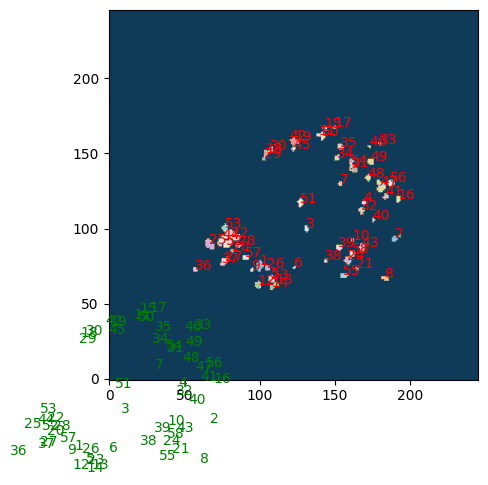

In [13]:
fig, ax = plt.subplots(1, 1)
ax.imshow(img_pex_max, origin='lower', cmap='gray')
label_img = measure.label(img_pex)
ax.imshow(np.max(label_img, axis=0), origin='lower', cmap='tab20', alpha=0.5)
mid_z, mid_y, mid_x = img_pex.shape[0]//2, img_pex.shape[1]//2, img_pex.shape[2]//2
positions = []
for i in range(1, label_img.max()+1):
    zcoords, ycoords, xcoords = np.where(label_img == i)
    centroids = (np.mean(ycoords), np.mean(xcoords))
    centroids_corrected = (centroids[0] - mid_y, centroids[1] - mid_x)
    positions.append([centroids_corrected[0], centroids_corrected[1]])
    # ax.scatter(centroids[1], centroids[0], c='r')
    ax.text(centroids[1], centroids[0], f"{i}", c='r')
    ax.text(centroids_corrected[1], centroids_corrected[0], f"{i}", c='g')
plt.show()


In [14]:
positions = np.array(positions)

(array([1., 1., 4., 3., 2., 1., 4., 6., 0., 4., 2., 0., 4., 2., 4., 6., 3.,
        4., 4., 3.]),
 array([-66.16129032, -59.40503304, -52.64877575, -45.89251846,
        -39.13626117, -32.38000389, -25.6237466 , -18.86748931,
        -12.11123202,  -5.35497474,   1.40128255,   8.15753984,
         14.91379712,  21.67005441,  28.4263117 ,  35.18256899,
         41.93882627,  48.69508356,  55.45134085,  62.20759813,
         68.96385542]),
 <BarContainer object of 20 artists>)

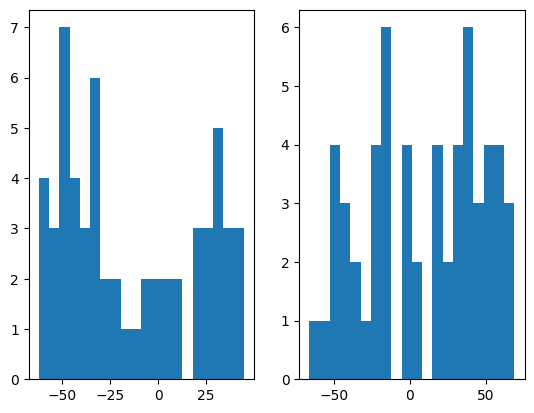

In [15]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(positions[:, 0], bins=20)
ax[1].hist(positions[:, 1], bins=20)

In [19]:
with open('/allen/aics/animated-cell/Saurabh/cellpack-analysis/data/structure_data/SLC25A17/sample_8d/positions_SLC25A17.json', 'w') as f:
    json.dump(positions_dict, f, indent=4, sort_keys=True)

In [20]:
xcoords, ycoords, zcoords = [], [], []
for cellid, position in positions_dict.items():
    xcoords.extend([x[0] for x in position[structure_name]])
    ycoords.extend([x[1] for x in position[structure_name]])
    zcoords.extend([x[2] for x in position[structure_name]])
xcoords = np.array(xcoords)
ycoords = np.array(ycoords)
zcoords = np.array(zcoords)
print(xcoords.shape)
    

(33912,)


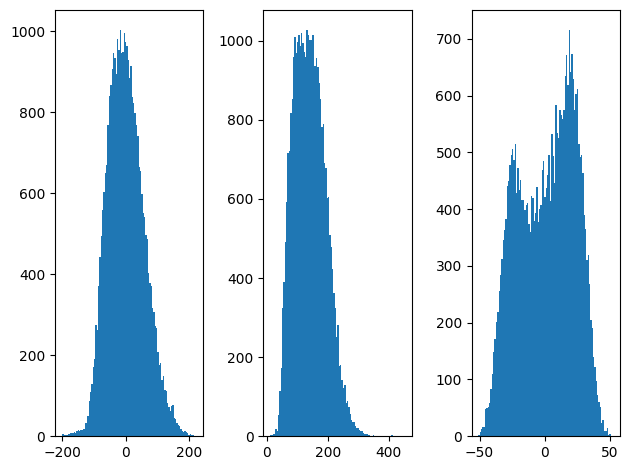

In [23]:
fig, ax = plt.subplots(1, 3)
ax[0].hist(xcoords, bins=100)
ax[1].hist(ycoords, bins=100)
ax[2].hist(zcoords, bins=100)
plt.tight_layout()
plt.show()